In [3]:
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
path = './lish-moa/'

# load dataset 

In [15]:
train_features = pd.read_csv(path + 'train_features.csv')
train_features.head(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [16]:
train_drug = pd.read_csv(path + 'train_drug.csv')
train_drug.head(5)

,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c
3,id_0015fd391,8c7f86626
4,id_001626bd3,7cbed3131


In [17]:
train_targets_nonscored = pd.read_csv(path + 'train_targets_nonscored.csv')
train_targets_nonscored.head(5)

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_targets_scored = pd.read_csv(path + 'train_targets_scored.csv')
train_targets_scored.head(5)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
sample_submission = pd.read_csv(path + 'sample_submission.csv')
sample_submission.head(5)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,id_002429b5b,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,id_00276f245,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,id_0027f1083,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [20]:
test_features = pd.read_csv(path + 'test_features.csv')
test_features.head(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


# Get data size

In [21]:
train_features.shape, test_features.shape

((23814, 876), (3982, 876))

In [22]:
train_targets_scored.shape, train_targets_nonscored.shape

((23814, 207), (23814, 403))

In [23]:
sample_submission.shape

(3982, 207)

# Check data types

In [24]:
train_features.dtypes   # length represents column number

sig_id      object
cp_type     object
cp_time      int64
cp_dose     object
g-0        float64
            ...   
c-95       float64
c-96       float64
c-97       float64
c-98       float64
c-99       float64
Length: 876, dtype: object

There are two different target datafrmaes, non-scored and scored. The non-scored ones are not used fro scoring, but we 

In [25]:
train_targets_scored.dtypes 

sig_id                                   object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object

In [26]:
train_targets_nonscored.dtypes

sig_id                                  object
abc_transporter_expression_enhancer      int64
abl_inhibitor                            int64
ace_inhibitor                            int64
acetylcholine_release_enhancer           int64
                                         ...  
voltage-gated_sodium_channel_blocker     int64
wdr5_mll_interaction_inhibitor           int64
wnt_agonist                              int64
xanthine_oxidase_inhibitor               int64
xiap_inhibitor                           int64
Length: 403, dtype: object

# Check null or not

In [27]:
train_features.isnull().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

In [28]:
train_features.isnull()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23811,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
test_features.isnull().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

In [30]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [31]:
train_targets_scored.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


performing a check for missing values. There are no missing values for both features and targets.

In [32]:
train_miss_features = train_features.isnull().sum().sum()
train_miss_targets = train_targets_scored.isnull().sum().sum()
print("Missing train features:", train_miss_features)
print("Missing train targets:", train_miss_targets)

Missing train features: 0
Missing train targets: 0


In [33]:
display(train_features.select_dtypes('int64').head(5))
display(train_features.select_dtypes('object').head(5))

,cp_time
0,24
1,72
2,48
3,48
4,72


,sig_id,cp_type,cp_dose
0,id_000644bb2,trt_cp,D1
1,id_000779bfc,trt_cp,D1
2,id_000a6266a,trt_cp,D1
3,id_0015fd391,trt_cp,D1
4,id_001626bd3,trt_cp,D2


# visualize some features

In [34]:
g_features = [cols for cols in train_features.columns if cols.startswith('g-')]
# print(g_features)

In [35]:
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=1.2)

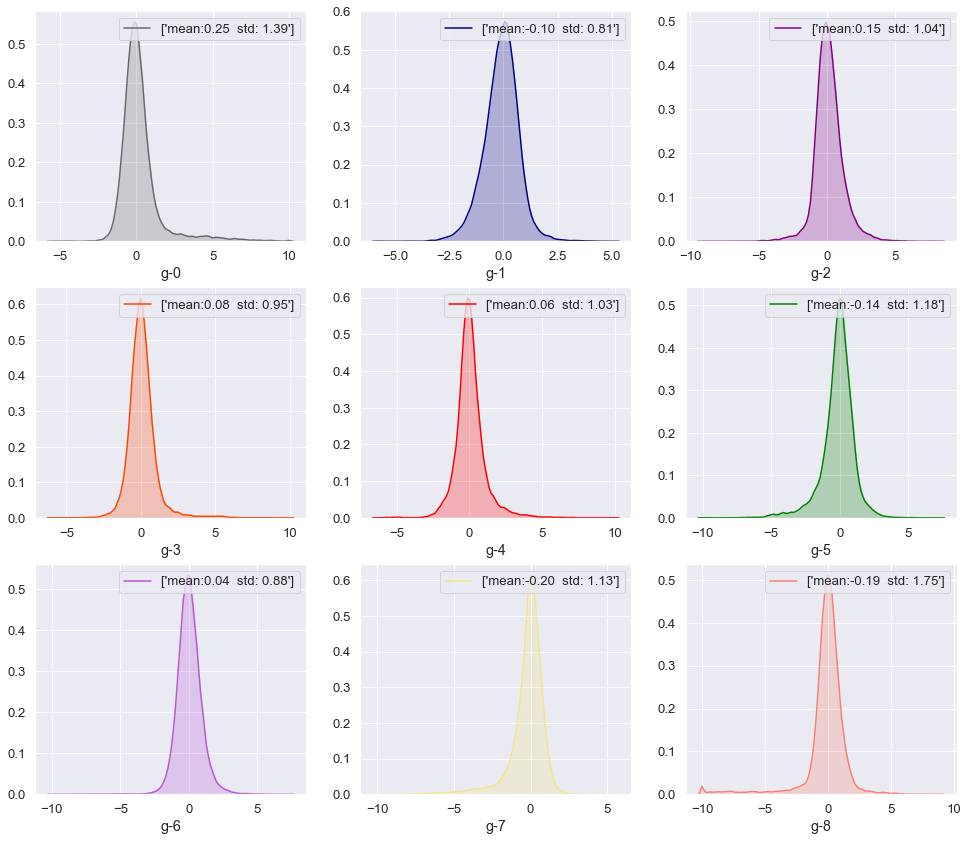

In [36]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen']
 
color_ind=0
n_row = 6
n_col = 3
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper right'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,9,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(train_features.loc[:,g_features[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(train_features.loc[:,g_features[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(train_features.loc[:,g_features[i]].std()))])
    
    plt.xlabel(g_features[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

# Cell viability features

In [37]:
c_features = [cols for cols in train_features.columns if cols.startswith('c-')]
print(c_features)

['c-0', 'c-1', 'c-2', 'c-3', 'c-4', 'c-5', 'c-6', 'c-7', 'c-8', 'c-9', 'c-10', 'c-11', 'c-12', 'c-13', 'c-14', 'c-15', 'c-16', 'c-17', 'c-18', 'c-19', 'c-20', 'c-21', 'c-22', 'c-23', 'c-24', 'c-25', 'c-26', 'c-27', 'c-28', 'c-29', 'c-30', 'c-31', 'c-32', 'c-33', 'c-34', 'c-35', 'c-36', 'c-37', 'c-38', 'c-39', 'c-40', 'c-41', 'c-42', 'c-43', 'c-44', 'c-45', 'c-46', 'c-47', 'c-48', 'c-49', 'c-50', 'c-51', 'c-52', 'c-53', 'c-54', 'c-55', 'c-56', 'c-57', 'c-58', 'c-59', 'c-60', 'c-61', 'c-62', 'c-63', 'c-64', 'c-65', 'c-66', 'c-67', 'c-68', 'c-69', 'c-70', 'c-71', 'c-72', 'c-73', 'c-74', 'c-75', 'c-76', 'c-77', 'c-78', 'c-79', 'c-80', 'c-81', 'c-82', 'c-83', 'c-84', 'c-85', 'c-86', 'c-87', 'c-88', 'c-89', 'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98', 'c-99']


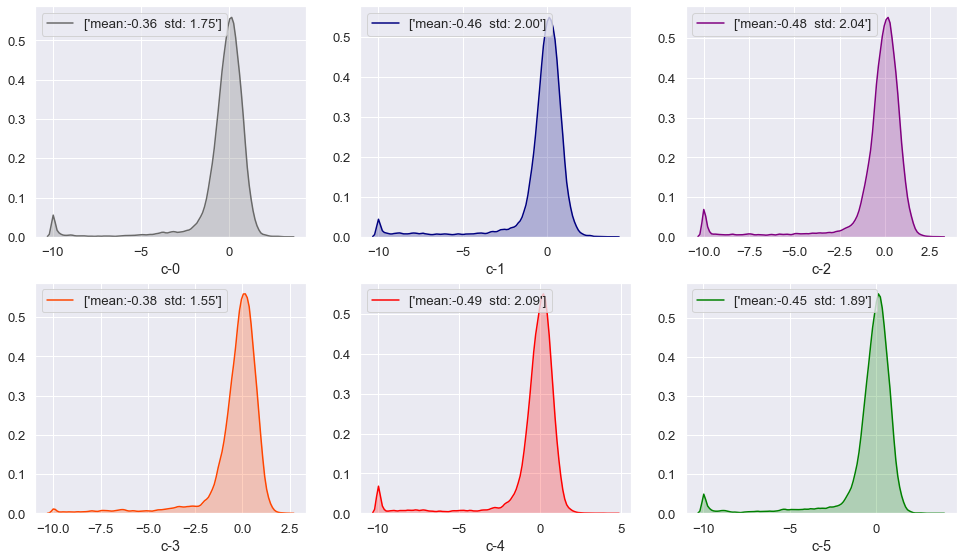

In [38]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen']
 
color_ind=0
n_row = 6
n_col = 3
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper left'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,6,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(train_features.loc[:,c_features[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(train_features.loc[:,c_features[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(train_features.loc[:,c_features[i]].std()))])
    
    plt.xlabel(c_features[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

### from this result, we can see data are somehow normalized and also clipped at [-10,10].

# Cp_time and cp_dose

### cp_time and cp_dose indicate treatment duration (24,48,72) and dose (high or low which are D1 and D2)

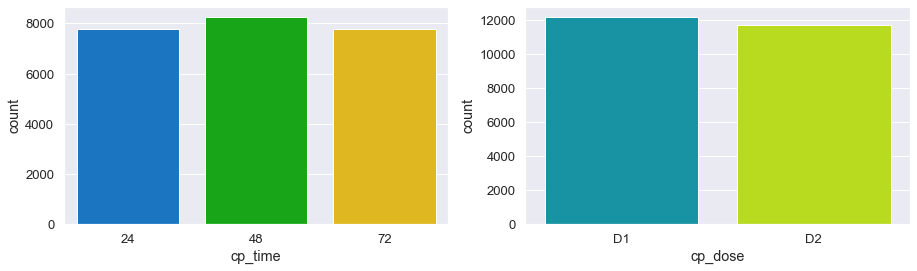

In [39]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(right=1.3)
plt.subplot(1, 2, 1)
sns.countplot(train_features['cp_time'],palette='nipy_spectral')
plt.subplot(1, 2, 2)
sns.countplot(train_features['cp_dose'],palette='nipy_spectral')
plt.show()

# Exploring some relationships

Next, we can use stripplot to show the relationship of a feature and a target with respect to dosage and time. Since, this is a multilabel probelm, we only show one label here, which is target 71. We will see later this target is contributing the most to the loss. For the feature, we chose two random g and c features. You may wanna do this with other features and labels to get more insight.

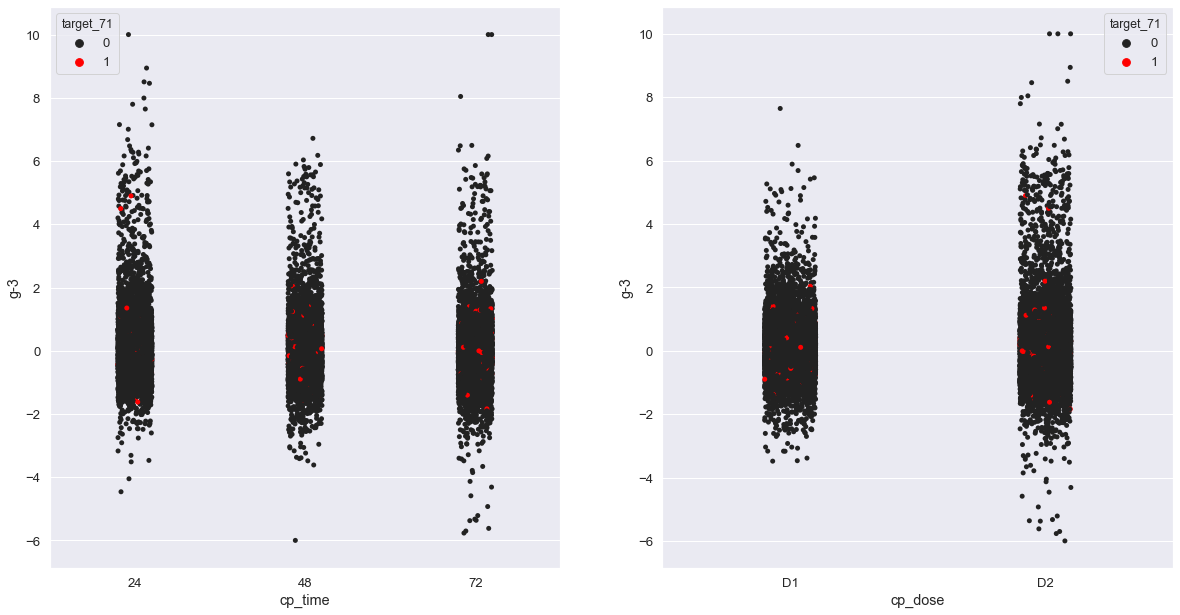

In [40]:
train_copy = train_features.copy()
train_copy['target_71'] = train_targets_scored.iloc[:,72]
# print(train_copy)
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(right=1.1, top=1.1)
ax1 = fig.add_subplot(121)
sns.stripplot(data= train_copy, x='cp_time', y='g-3',color='red',hue='target_71',ax=ax1)
ax2 = fig.add_subplot(122)
sns.stripplot(data = train_copy, x='cp_dose', y='g-3',color='red',hue='target_71',ax=ax2)
plt.show()

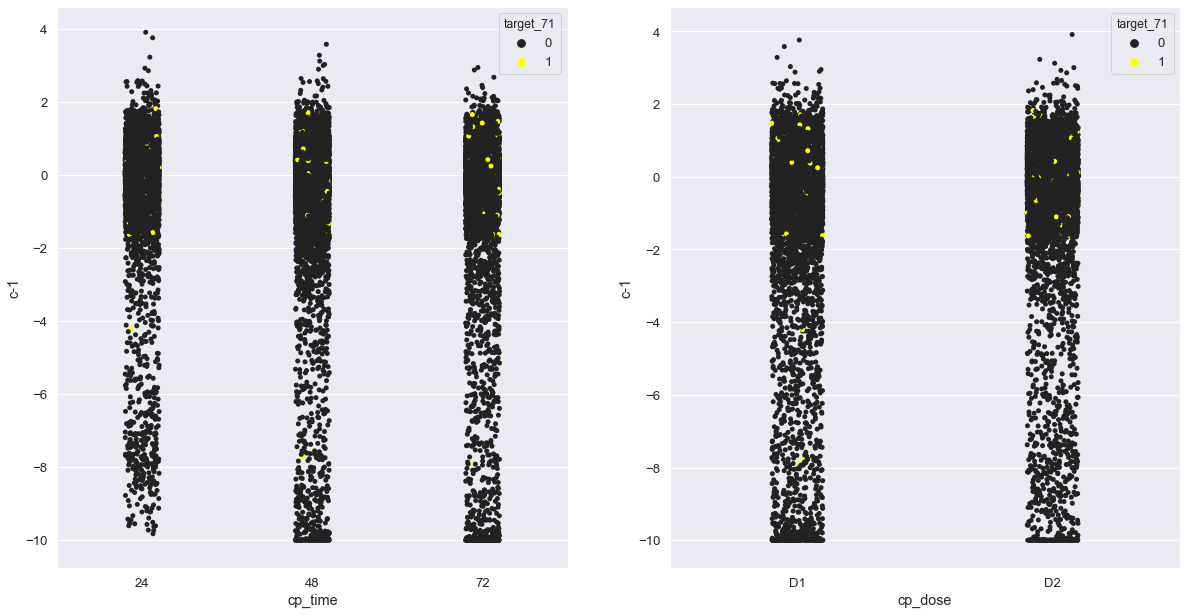

In [41]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(right=1.1,top=1.1)
ax1 = fig.add_subplot(121)
sns.stripplot(data= train_copy, x='cp_time', y= 'c-1',color='yellow', hue='target_71',ax=ax1)
ax2 = fig.add_subplot(122)
sns.stripplot(data= train_copy , x='cp_dose', y= 'c-1',color='yellow', hue='target_71',ax=ax2)
plt.show()

### we can get some insights from the figures above and apply it in our preprocessing step

# Targets

Below are some scored targets which are used to train the main model. As we can see, the targets are very imbalanced and there are only a few positive examples in some labels.

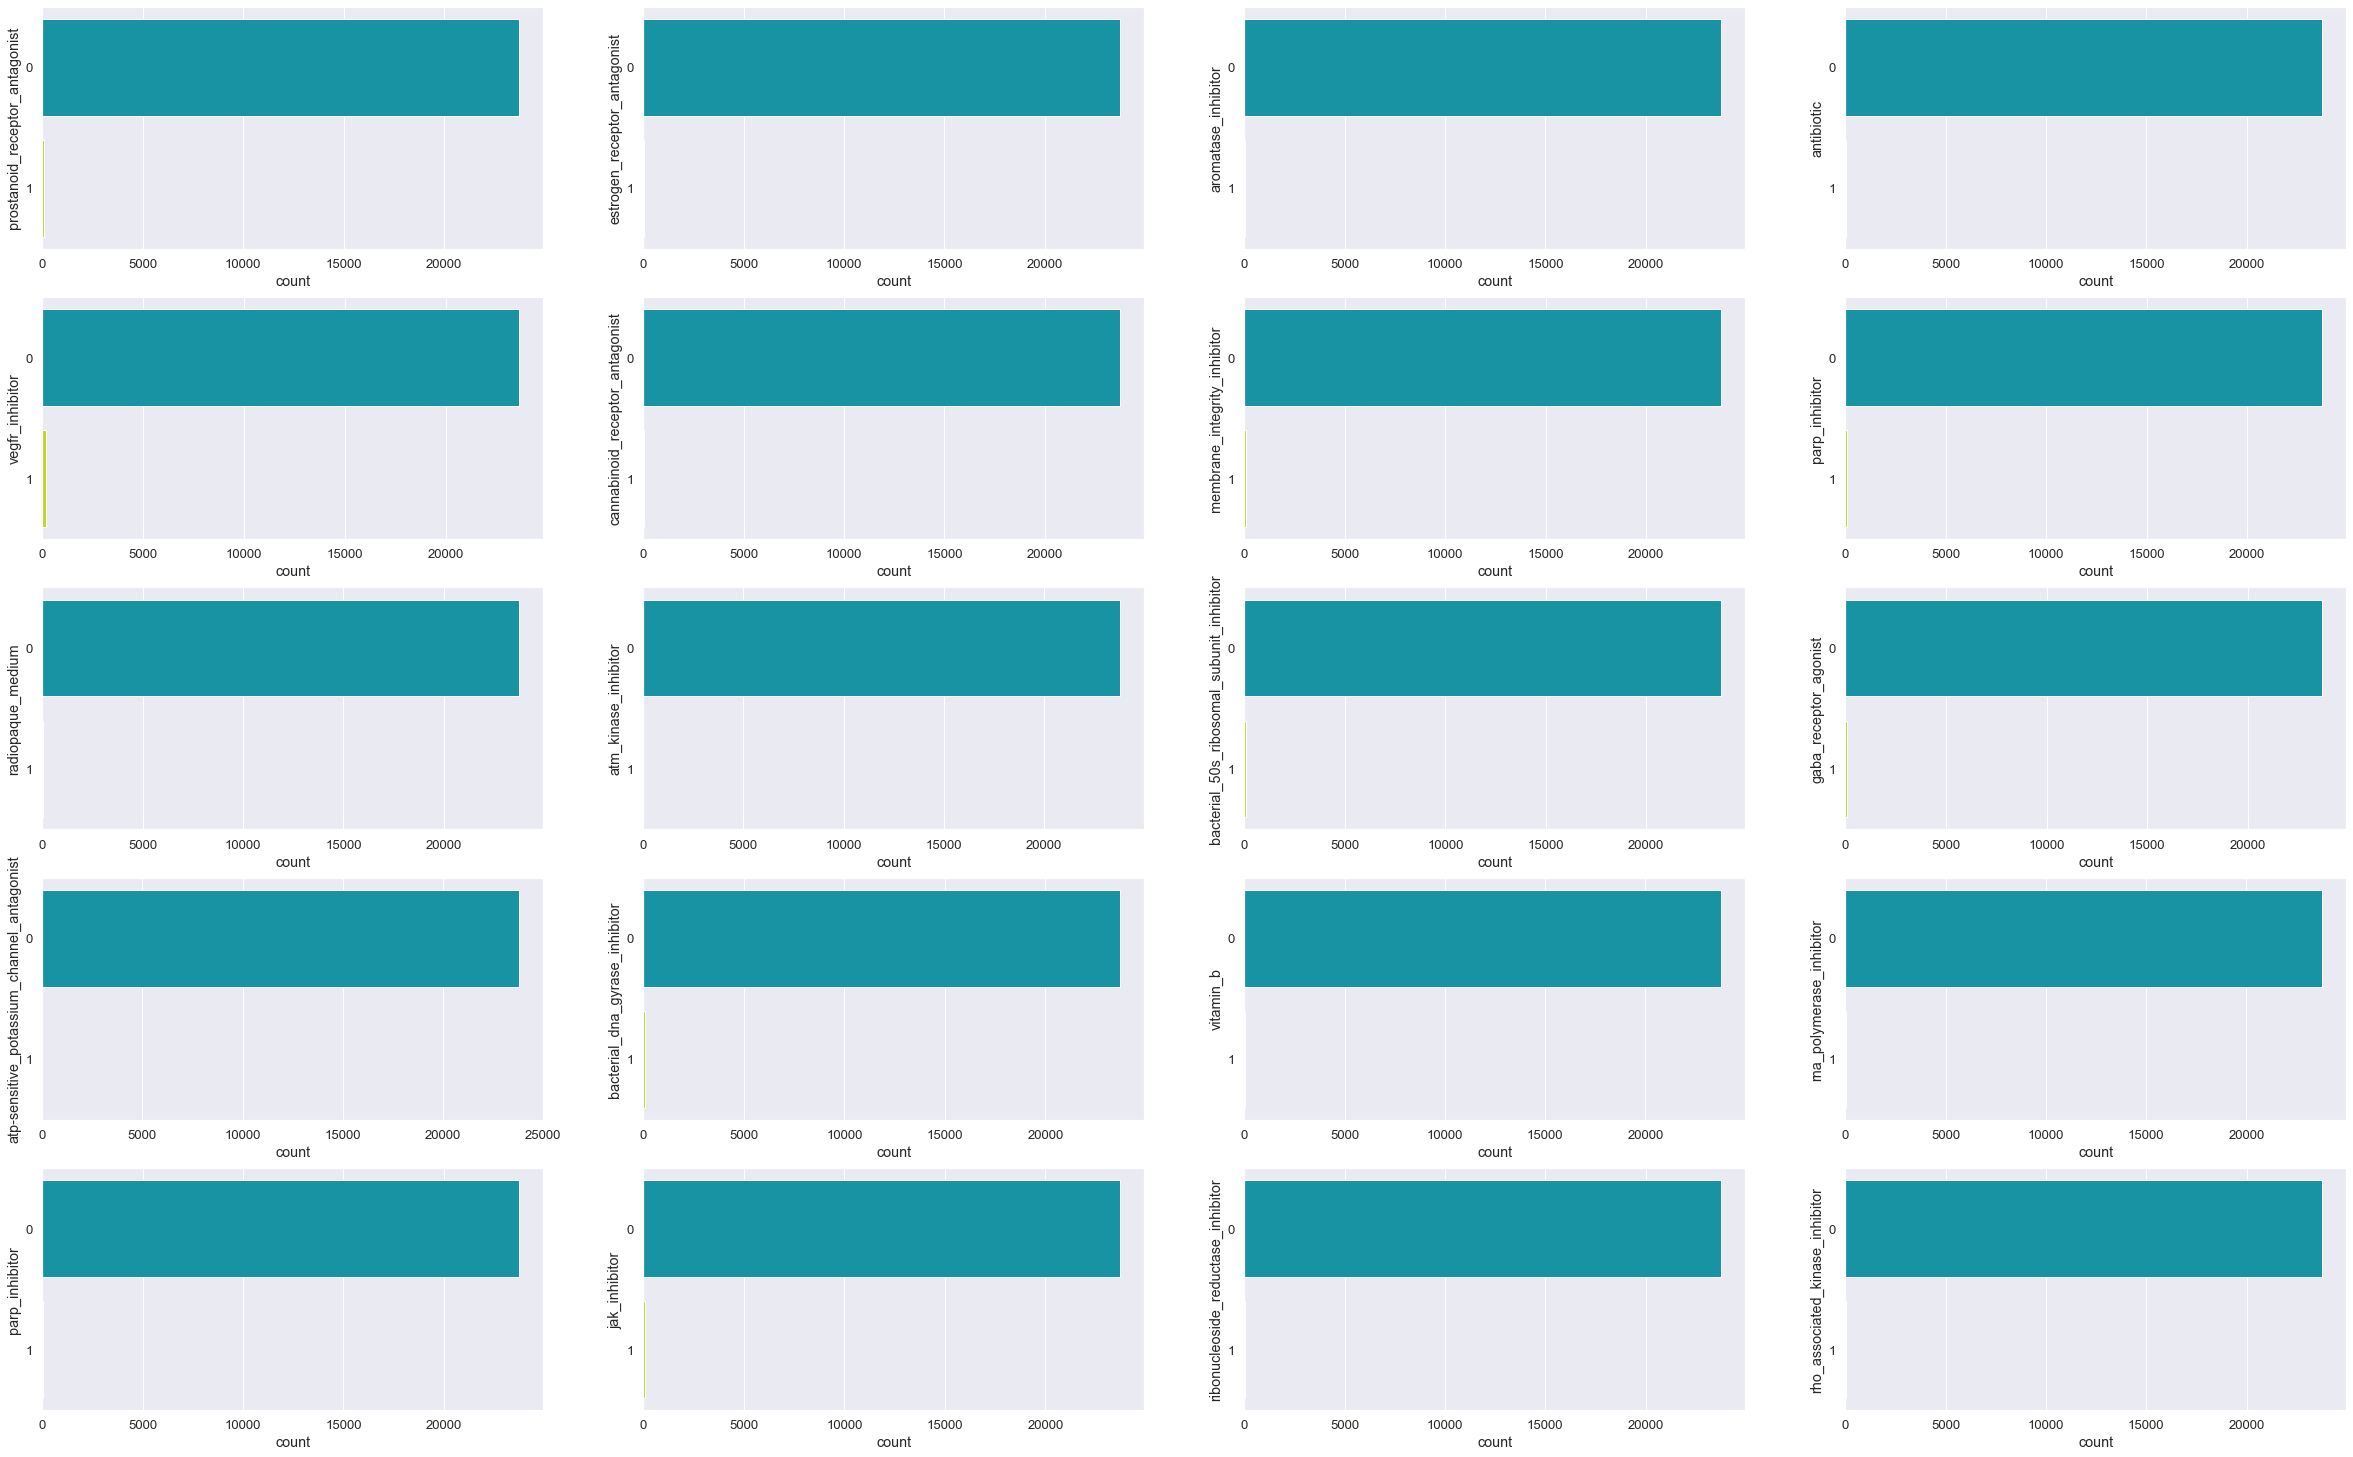

In [49]:
import sys
import matplotlib; matplotlib.use('TkAgg')
target_s_copy = train_targets_scored.copy()
target_s_copy.drop('sig_id', axis=1, inplace=True)
n_row = 20
n_col = 4 
n_sub = 1   
fig = plt.figure(figsize=(20,50))
fig.show()
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in np.random.choice(np.arange(0,target_s_copy.shape[1],1),n_row):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(y=target_s_copy.iloc[:, i],palette='nipy_spectral',orient='h')
    
    # plt.legend()   
    # plt.legend（）函数主要的作用就是给图加上图例，plt.legend([x,y,z])里面的参数使用的是list的的形式将图表的的名称喂给这和函数。
    n_sub+=1
plt.show()

## Let us see the 10 largest number of labels in the scored targets.

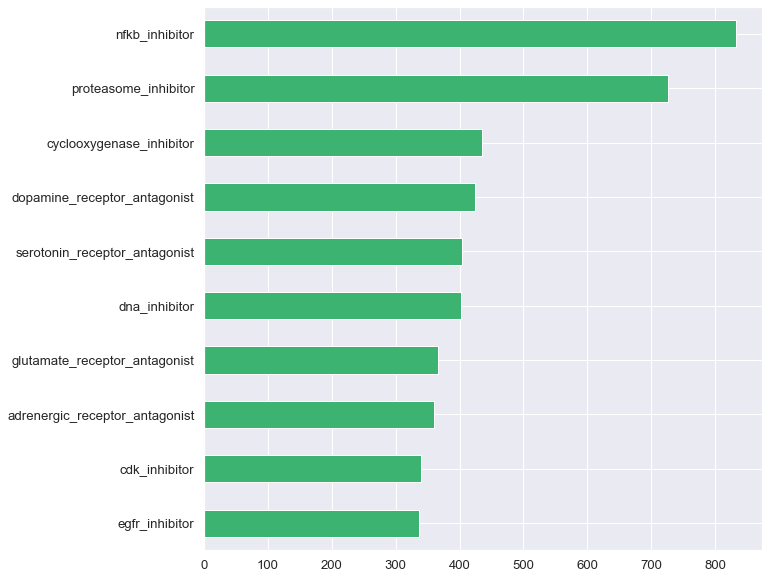

In [43]:
plt.figure(figsize=(10,10))
target_s_copy.sum().sort_values()[-10:].plot(kind='barh',color='mediumseagreen')
plt.show()

### And for the non-scored targets, we can find that some labels do not have positive examples at all

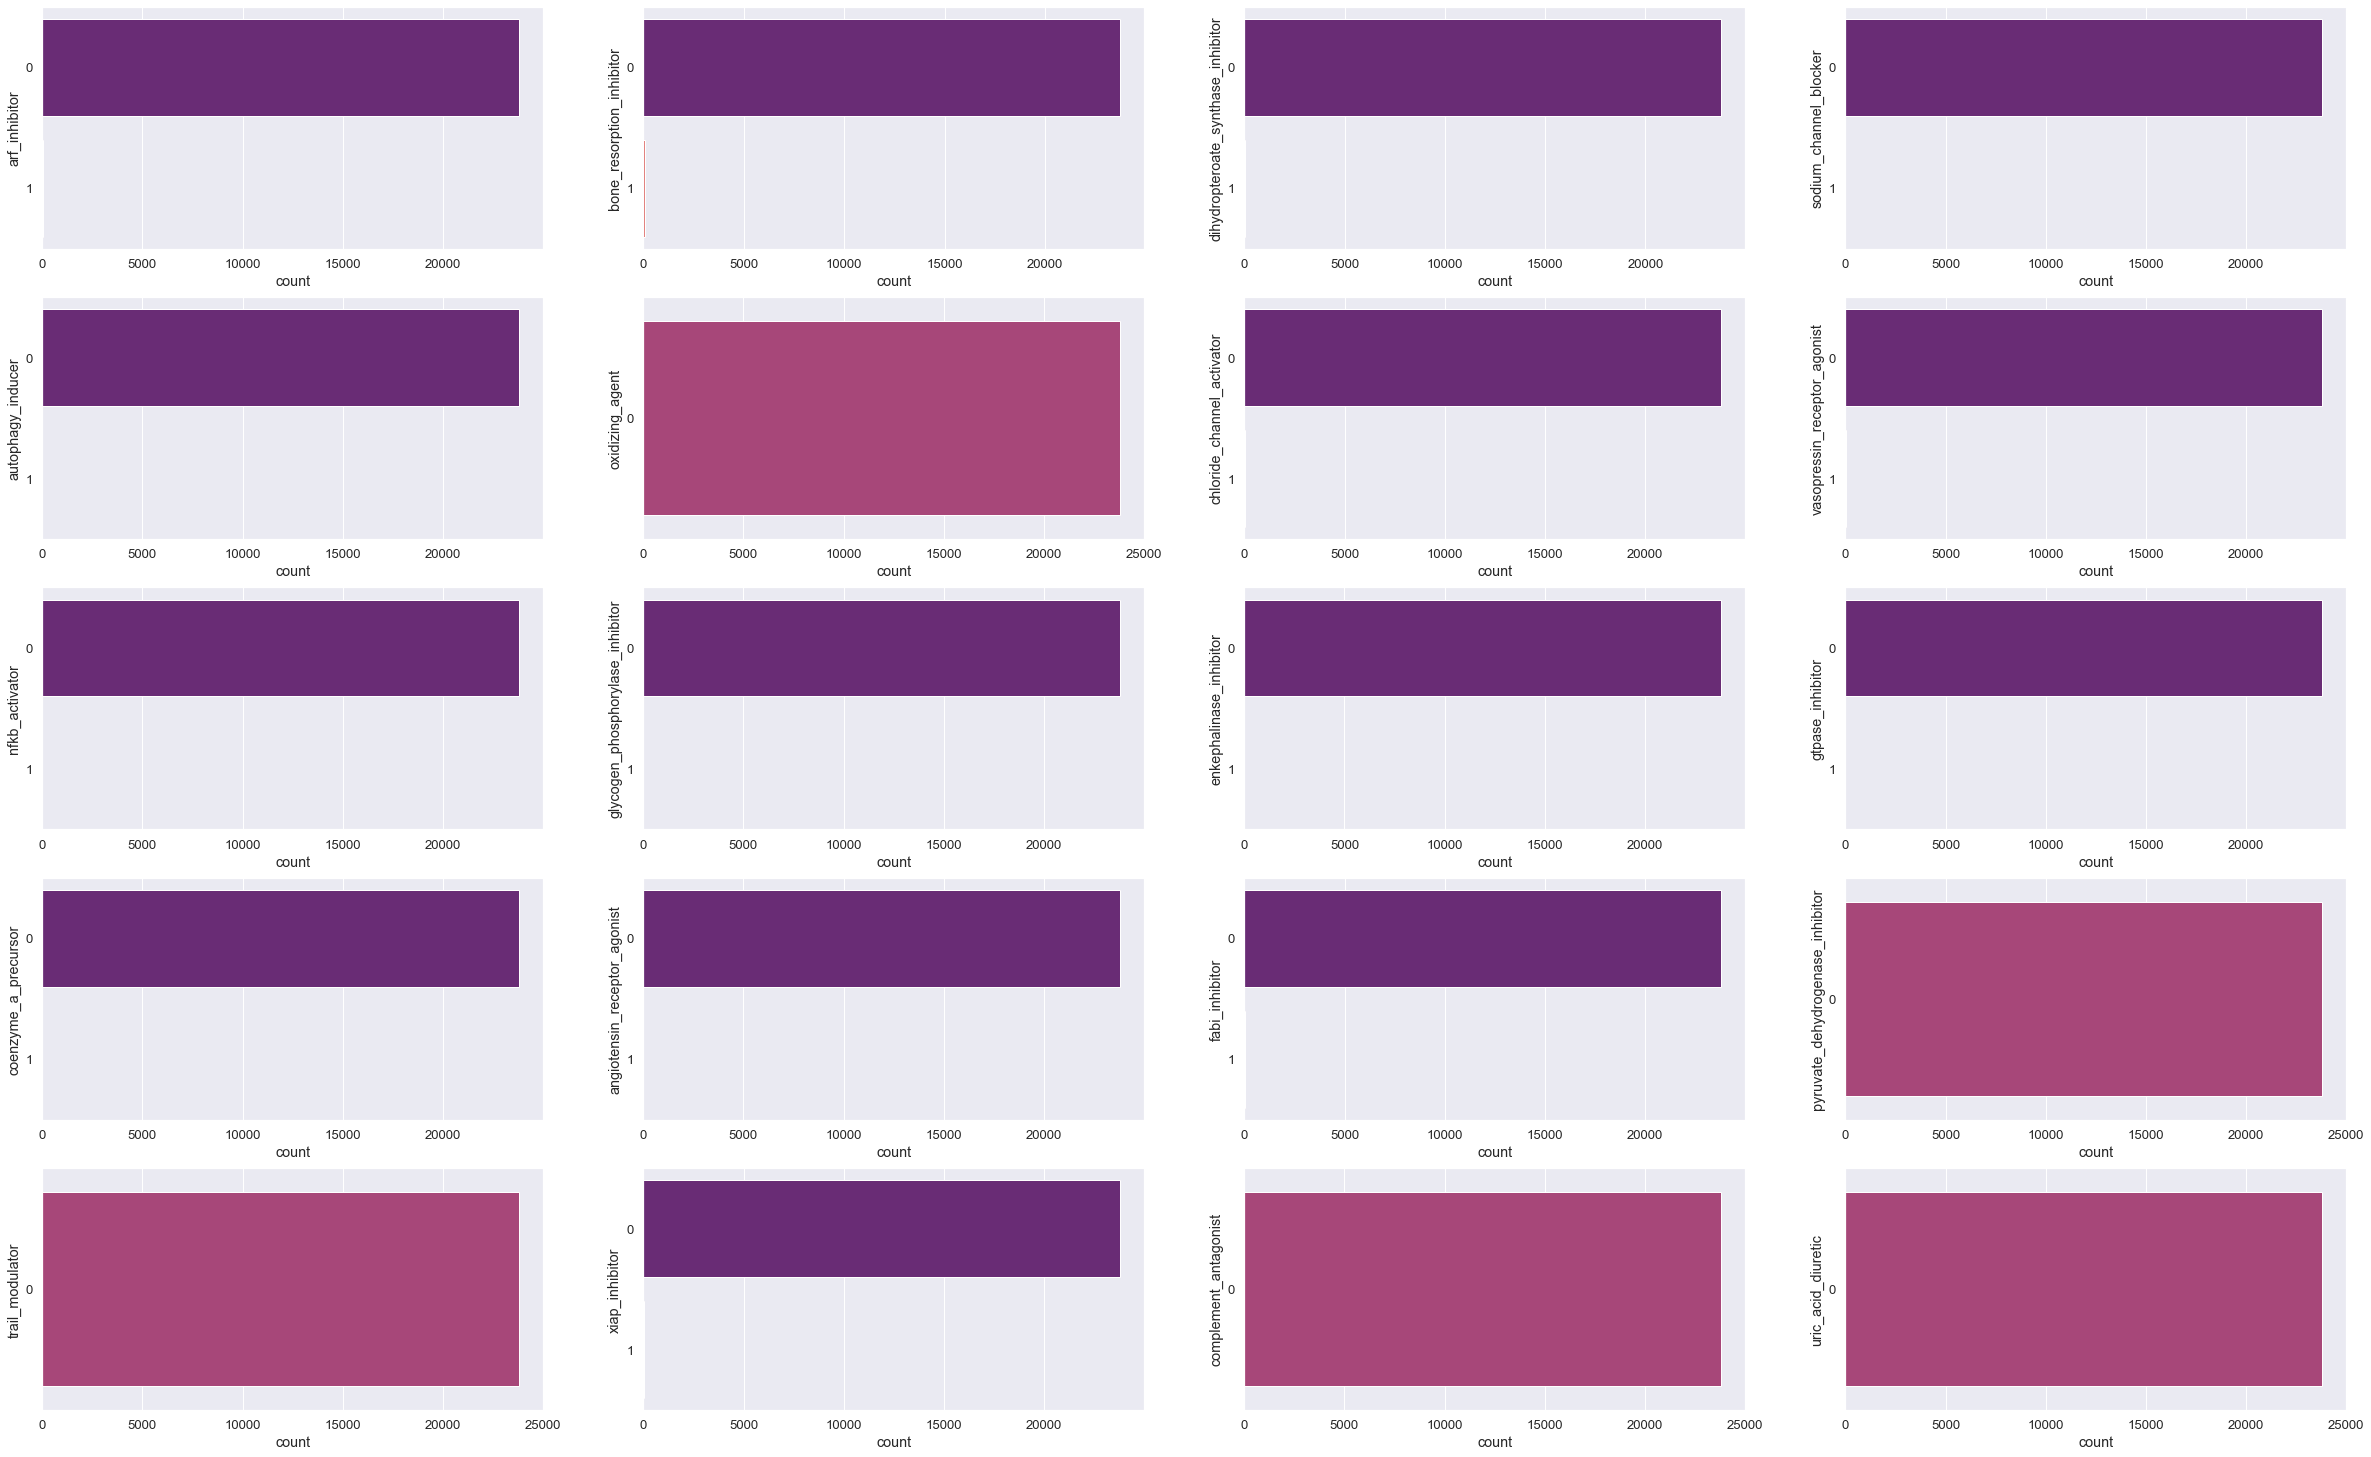

In [48]:
target_ns_copy = train_targets_nonscored.copy()
target_ns_copy.drop('sig_id',axis=1, inplace=True)
n_row = 20
n_col = 4
n_sub = 1
fig = plt.figure(figsize = (20,50))
plt.subplots_adjust(left=-0.3,right=1.3,bottom=-0.3,top=1.3)
for i in np.random.choice(np.arange(0,target_ns_copy.shape[1],1),n_row):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(y=target_ns_copy.iloc[:,i], palette='magma',orient='h')
    # plt.legend()
    n_sub+=1
plt.show()

### And here is the 10 largest positive number of labels in the non-scored targets

In [ ]:
plt.figure(figsize=(10,10))
target_ns_copy.sum().sort_values()[-10:].plot(kind='barh',color='purple')
plt.show()